# Data set #2 Maternal Health Risk 

In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.17.0'

In [55]:
dataset = pd.read_csv('/home/paulj/niru/INFO6105_DataSci/Maternal Health Risk Data Set.csv') 
#importing the dataset


In [56]:
# Display basic information about the dataset
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [57]:
# Display summary statistics
print(dataset.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [58]:
# First, I checked for missing values in the dataset:
print(dataset.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [59]:
# Display unique values in categorical columns
print(dataset['RiskLevel'].value_counts())


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


## Data Visualization

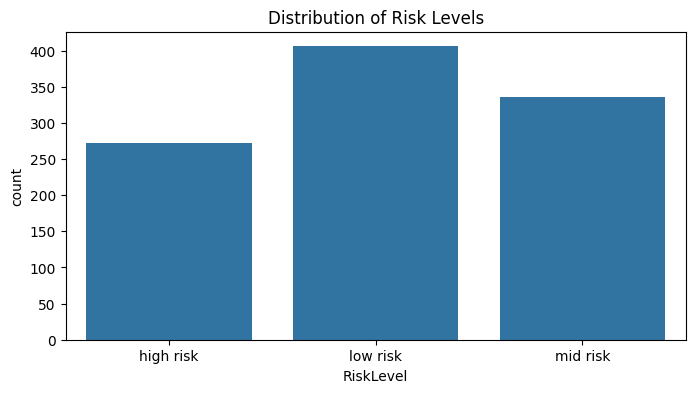

In [60]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Distribution of Risk Levels
plt.figure(figsize=(8,4))
sns.countplot(x='RiskLevel', data=dataset)
plt.title('Distribution of Risk Levels')
plt.show()


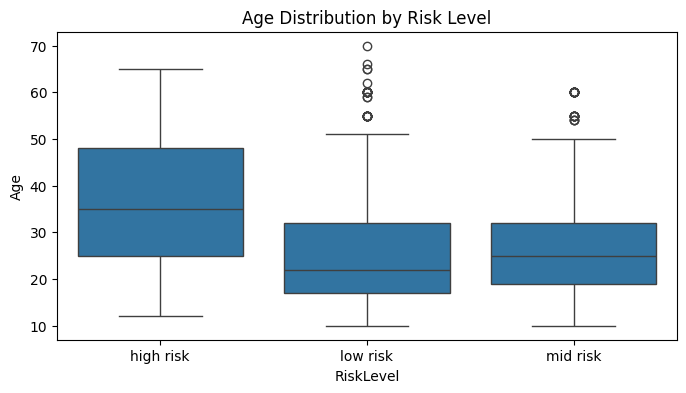

In [61]:
# 2. Age distribution by Risk Level
plt.figure(figsize=(8,4))
sns.boxplot(x='RiskLevel', y='Age', data=dataset)
plt.title('Age Distribution by Risk Level')
plt.show()

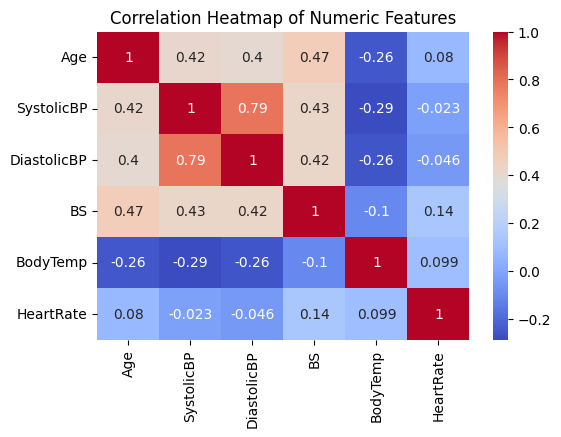

In [62]:
# 3. Correlation Heatmap (only for numeric columns)
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(6,4))
sns.heatmap(dataset[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

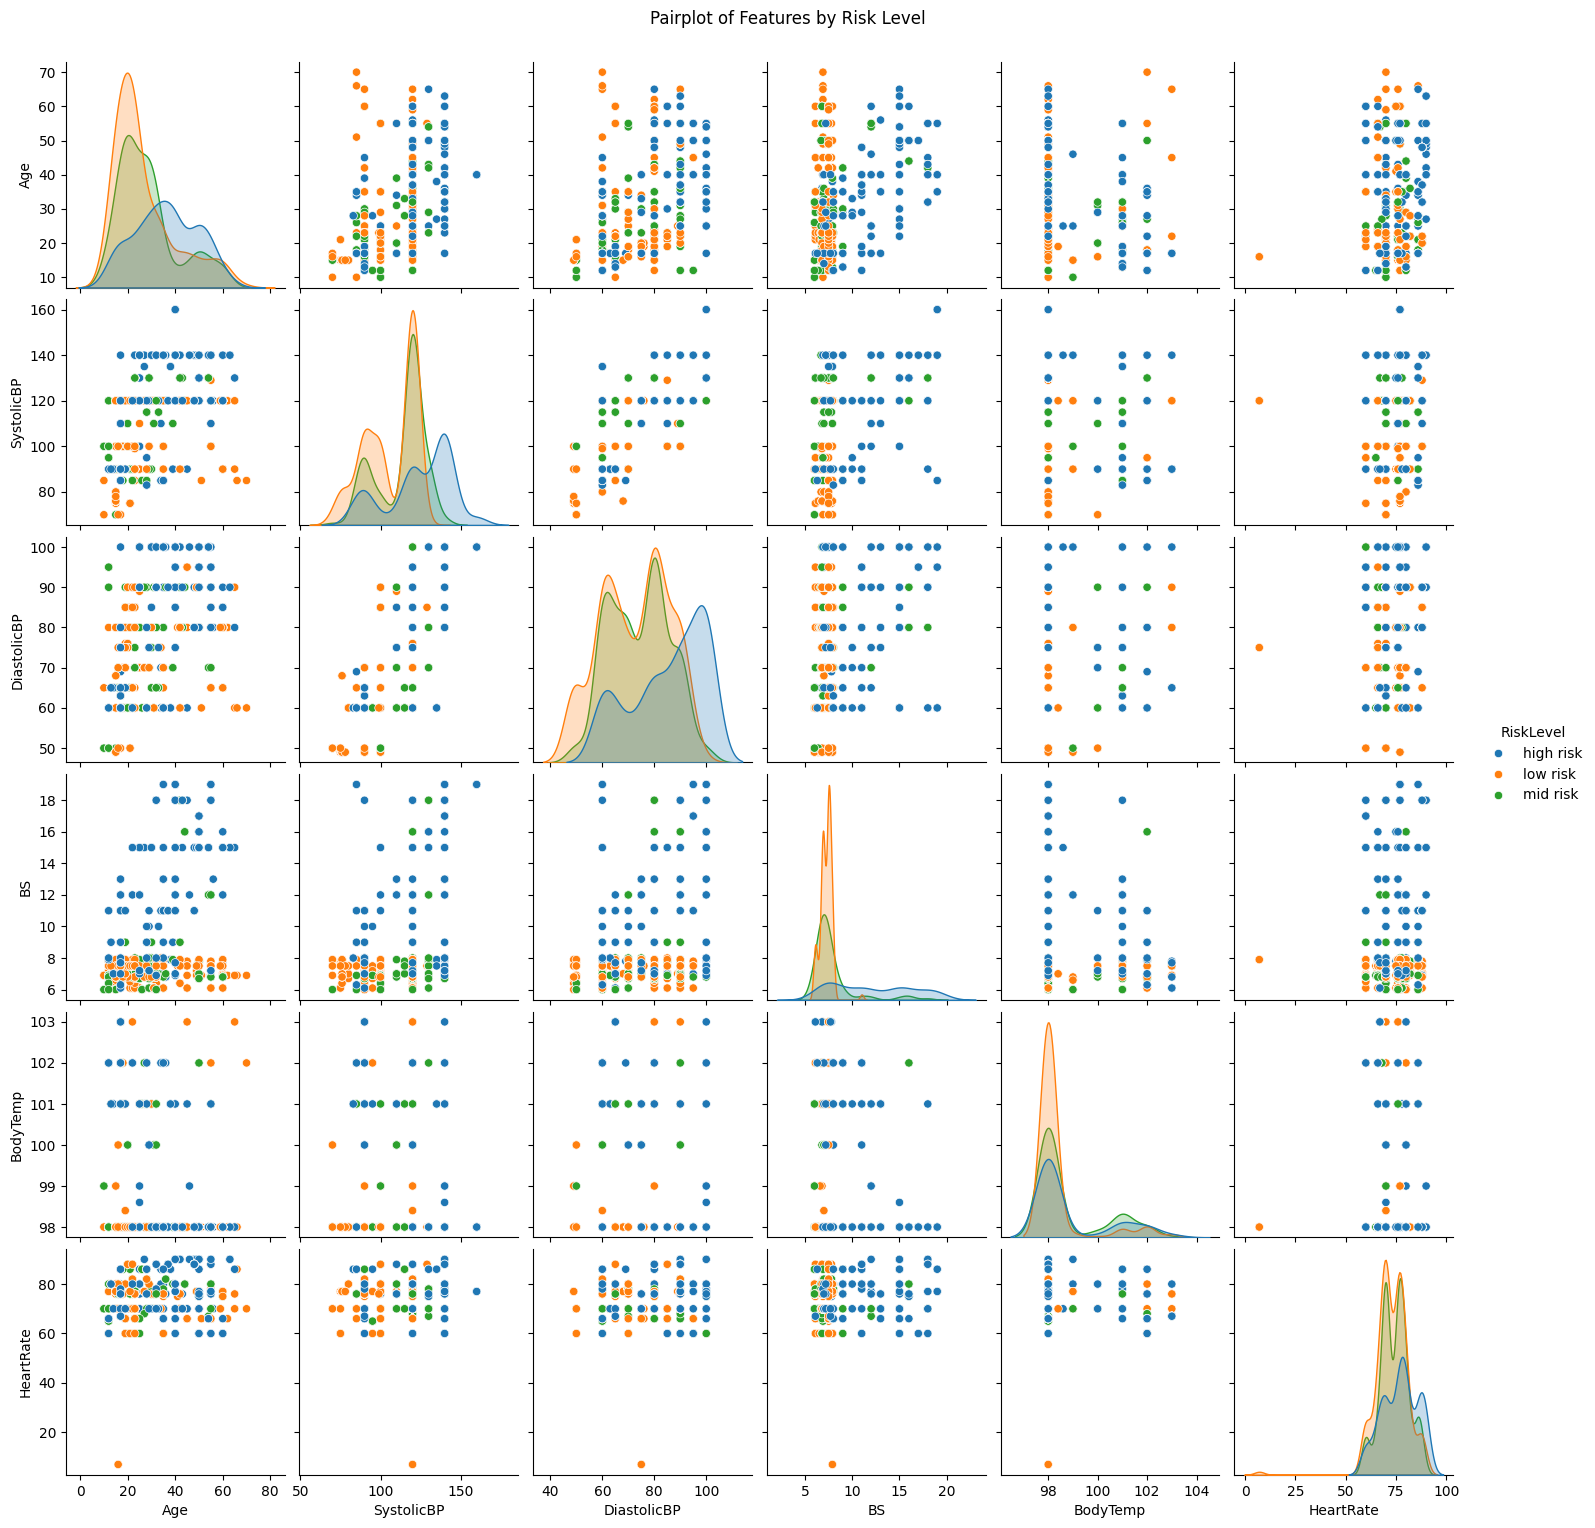

In [63]:
# 4. Pairplot of numerical features
sns.pairplot(dataset, hue='RiskLevel', vars=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])
plt.suptitle('Pairplot of Features by Risk Level', y=1.02)
plt.savefig('feature_pairplot.png')
plt.show()

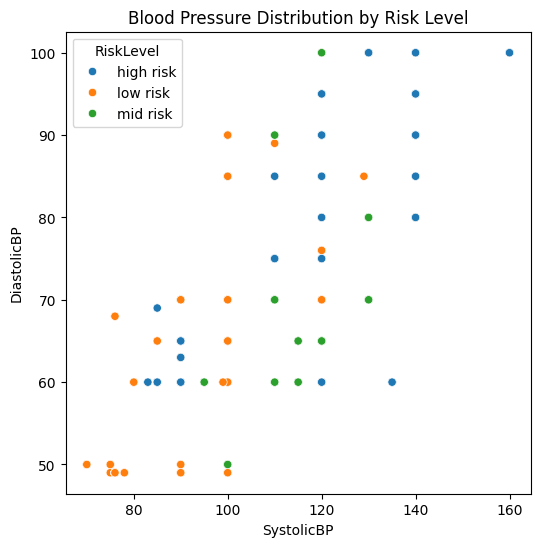

In [64]:
# 5. Blood Pressure Distribution
plt.figure(figsize=(6, 6))
sns.scatterplot(x='SystolicBP', y='DiastolicBP', hue='RiskLevel', data=dataset)
plt.title('Blood Pressure Distribution by Risk Level')
plt.savefig('blood_pressure_distribution.png')
plt.show()

## Data Cleaning and Preprocessing Steps

In [65]:
# Step 1: Handle missing values (if any)
# In this case, there are no missing values, so we can skip this step

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder




Feature Encoding
The 'RiskLevel' column, being categorical, required encoding. So converted the risk levels to 
numerical values: 0 for Low Risk, 1 for Mid Risk, and 2 for High Risk.


In [ ]:
# Step 2: Encode categorical variables
le = LabelEncoder()
dataset['RiskLevel'] = le.fit_transform(dataset['RiskLevel'])

In [66]:
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


In [67]:
# Step 3: Split features and target variable
X = dataset.drop('RiskLevel', axis=1)
y = dataset['RiskLevel']


Feature Scaling
To ensure all features contribute equally to the model and to improve convergence speed, I applied feature scaling as below: 
This standardization transforms the features to have a mean of 0 and a standard deviation of 1.

In [68]:
# Step 4: Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-0.36173812,  0.91339632,  0.25502279,  1.90589019, -0.4852155 ,
         1.44695615],
       [ 0.38077697,  1.45702716,  0.97553854,  1.29833966, -0.4852155 ,
        -0.53208757],
       [-0.06473208, -1.26112705, -0.46549297, -0.22053665,  0.97388449,
         0.70481475],
       ...,
       [ 0.38077697, -1.53294248, -1.18600873,  3.12099124, -0.4852155 ,
         1.44695615],
       [ 0.97478904,  0.36976548,  0.97553854,  2.81721597, -0.4852155 ,
        -0.53208757],
       [ 0.15802244,  0.36976548, -0.82575085, -0.82808717,  1.70343448,
         0.21005383]])

I split the data into training and testing sets. This creates a training set with 80% of the data and a test set with the remaining 20%.

In [69]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [70]:
print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)
# The data is now ready for ANN implementation

Shape of training set: (811, 6)
Shape of testing set: (203, 6)


## ANN implementation

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [72]:
# Convert target to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

## ANN Structure

The Artificial Neural Network (ANN) model designed for the Maternal Health Risk classification task is structured to extract patterns from a limited set of features, uses regularization techniques to combat overfitting on a small dataset, and is structured to output probabilities for a three-class risk assessment problem. The model uses ReLU (Rectified Linear Unit) activation functions in the hidden layers to introduce non-linearity and improve the model's ability to learn complex patterns. The softmax activation in the output layer produces a probability distribution over the three risk classes. Dropout layers are included to reduce overfitting by randomly setting a fraction of input units to 0 at each update during training, which helps prevent complex co-adaptations on training data.

This model architecture consists of:
• An input layer with 64 neurons and ReLU activation, taking input shaped according to
the training data.
• A dropout layer with a rate of 0.3 to prevent overfitting.
• A hidden layer with 32 neurons and ReLU activation.
• Another dropout layer with a rate of 0.3.
• A hidden layer with 16 neurons and ReLU activation.
• An output layer with 3 neurons and softmax activation, suitable for multi-class classifi-
cation of maternal health risk levels.

The model uses ReLU (Rectified Linear Unit) activation functions in the hidden layers to
introduce non-linearity and improve the model’s ability to learn complex patterns. The softmax
activation in the output layer produces a probability distribution over the three risk classes.
Dropout layers are included to reduce overfitting by randomly setting a fraction of input
units to 0 at each update during training, which helps prevent complex co-adaptations on
training data.
This architecture is designed to balance betIen model complexity and generalization, making
it suitable for classifying maternal health risks based on the available features in the dataset. 

In [73]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])


/home/paulj/niru/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [75]:
# Train the model
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3154 - loss: 1.1375 - val_accuracy: 0.5092 - val_loss: 1.0587
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.4814 - loss: 1.0410 - val_accuracy: 0.4724 - val_loss: 0.9878
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.5545 - loss: 0.9677 - val_accuracy: 0.5153 - val_loss: 0.9300
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.5686 - loss: 0.9233 - val_accuracy: 0.5644 - val_loss: 0.8858
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.5956 - loss: 0.8788 - val_accuracy: 0.5828 - val_loss: 0.8469
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5921 - loss: 0.8321 - val_accuracy: 0.5767 - val_loss: 0.8248
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.6151 - loss: 0.8268 - val_accuracy: 0.6196 - val_loss: 0.8063
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.6609 - loss: 0.7774 - val_accuracy: 0.6442 - v


Initially, at epoch 10, the model achieved an accuracy of approximately 68\%. By the final epoch, this improved to about 70\%, indicating a modest but steady learning progression. The validation accuracy, while fluctuating throughout the training, showed an overall improvement from 63\% to 66\%. This slight gap between training and validation accuracies suggests mild overfitting, though not severe. Concurrently, the loss function for both training and validation sets decreased from around 0.75 to 0.60, reflecting the model's increasing ability to minimize prediction errors. These results indicate that while the model learned useful patterns from the data, the improvement was incremental, possibly due to the limited size and complexity of the dataset. The relatively small difference between training and validation metrics suggests reasonable generalization, but also points to potential areas for further optimization to enhance the model's predictive power on unseen data.

In [76]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.6749


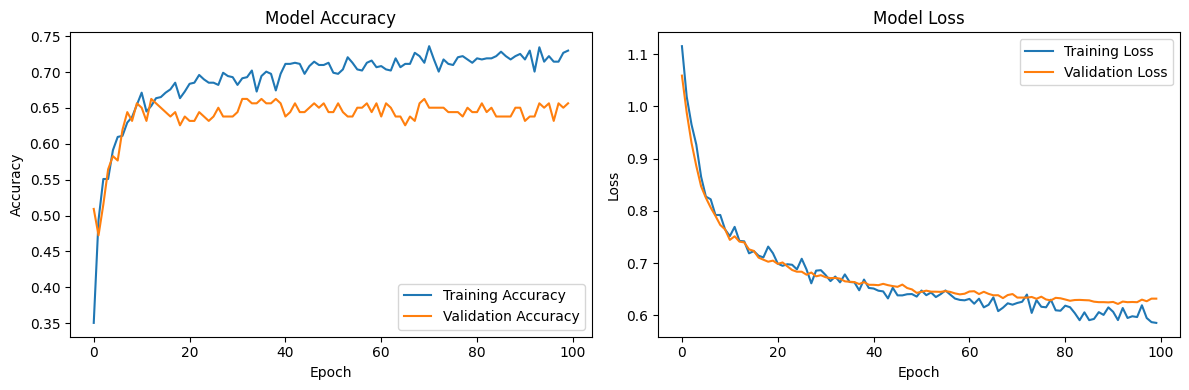

In [77]:

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('ann_training_history.png')
plt.show()

In [78]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

   high risk       0.76      0.87      0.81        47
    low risk       0.61      0.86      0.71        80
    mid risk       0.77      0.36      0.49        76

    accuracy                           0.67       203
   macro avg       0.71      0.70      0.67       203
weighted avg       0.70      0.67      0.65       203



Analyzing the performance for each risk category provides deeper insights into the model's strengths and Iaknesses:

High Risk
The model performs best in identifying high-risk cases, with a high recall (87\%) and a good balance betIen precision and recall (F1-score: 0.80). This suggests that the model is effective at identifying most of the high-risk cases, which is crucial from a healthcare perspective.

Low Risk
For low-risk cases, the model demonstrates high recall (85\%) but loIr precision (60\%). This indicates that while the model successfully identifies most low-risk cases, it may overclassify some medium or high-risk cases as low risk. This tendency could potentially lead to underestimating risks in some cases.

Mid Risk
The model struggles most with mid-risk cases, showing low recall (34\%) but relatively high precision (74\%). This suggests that while it rarely misclassifies other risks as mid-risk, it often fails to identify true mid-risk cases. The low F1-score (0.47) for this category indicates a significant area for improvement.